C:\Users\kanio\AppData\Local\Temp/ipykernel_276/3869418000.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(x["x"],fontsize= 28)
C:\Users\kanio\AppData\Local\Temp/ipykernel_276/3869418000.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(x["x"],fontsize= 28)
C:\Users\kanio\AppData\Local\Temp/ipykernel_276/3869418000.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(np.arange(-200,50,50),fontsize= 28)
C:\Users\kanio\AppData\Local\Temp/ipykernel_276/3869418000.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.arange(90,290,5),fontsize= 28)


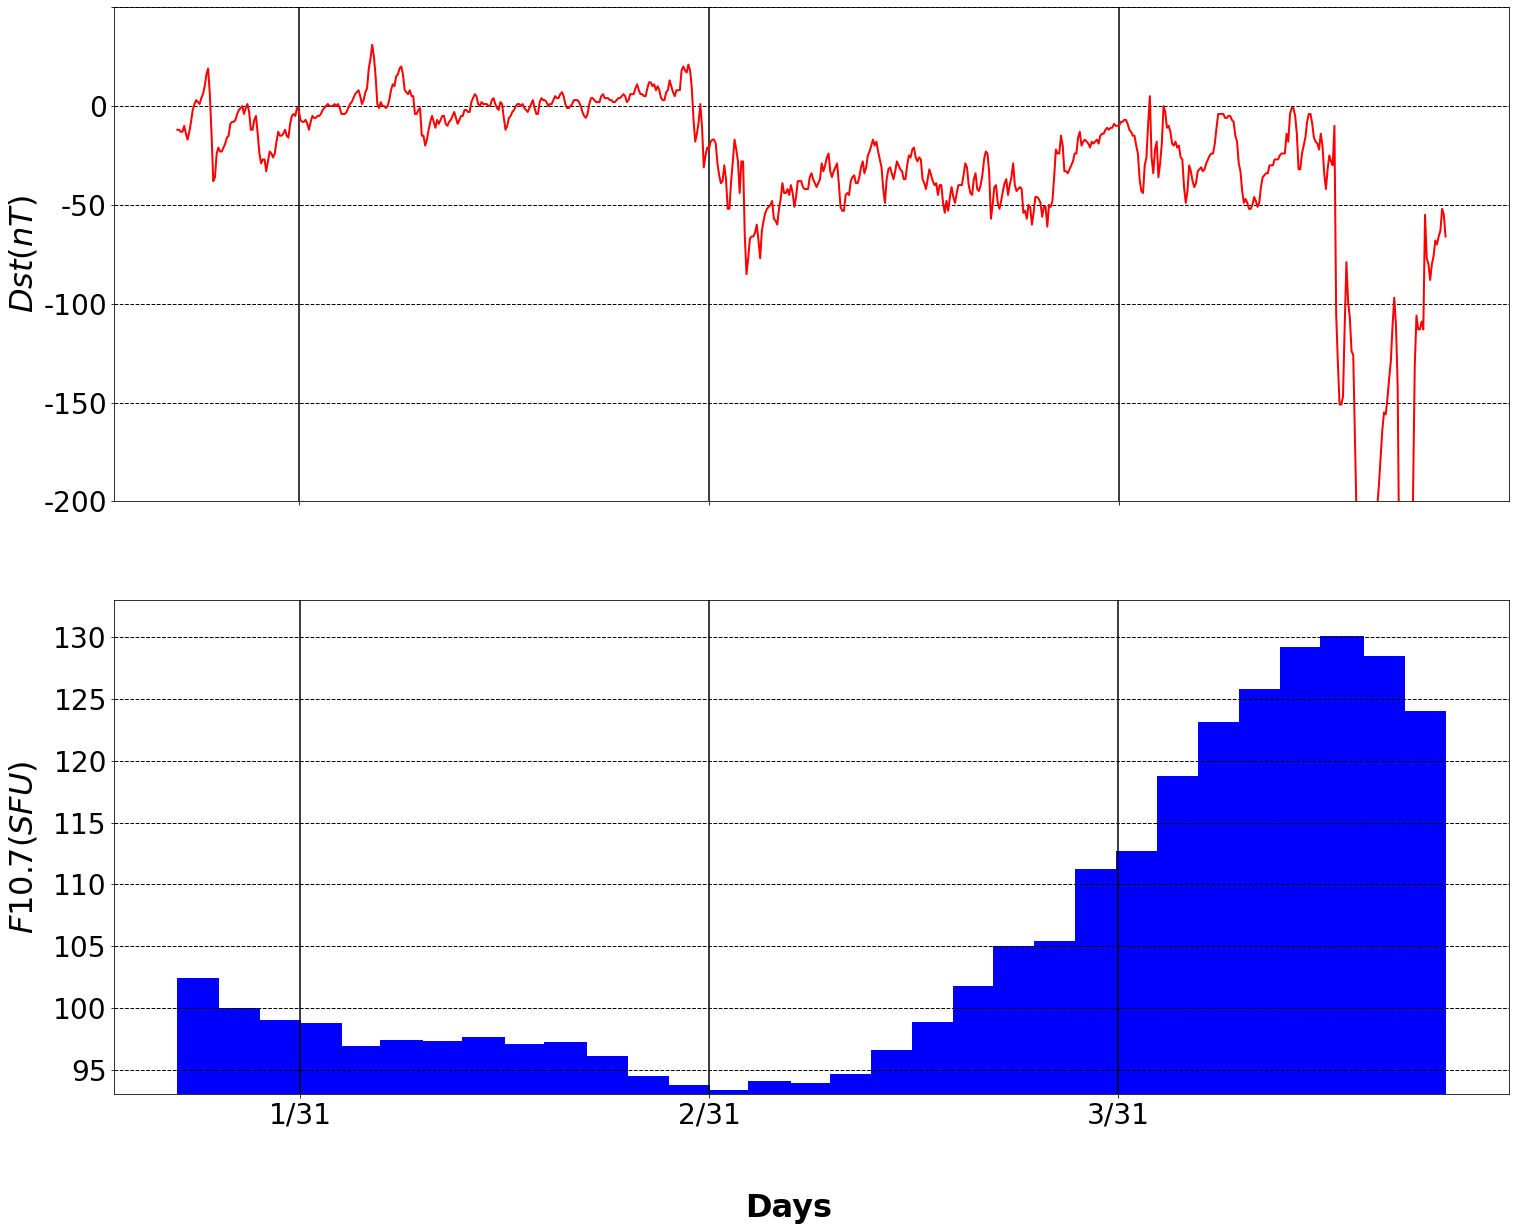

In [35]:
#CODES FOR  SOLAR AND GEOMAGNETIC PARAMETER

#THE STRUCTURE OF THE CODE
#The required libraries was imported
#The read data was converted to DataFrame
#Header was then set for each column
#The graph was plotted on grid format with month on xaxis and Dst_index, nT and F10.7_index on yaxis.
#Lastly the graph was saved as jpg (picture) and showed to the screen

#THESE LINES OF CODES IS RESPONSIBLE IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import fnmatch
from matplotlib import dates
import matplotlib
from matplotlib import dates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

navalues =[9999,99999,999.9, 999999.99,99999.9,999999.99, 
           99.99,99999.99,999.99,99999.99, 99.99000,999999.99,999999.99,99999.99]

#READING THE USED DATA TO DATAFRAME USING THE PANDAS LIBRARY AND CONVERTING IT TO THE APPOPRIATE FORM FOR PLOTTING.
low_res_header = ['YEAR', 'DOY','Hour',"SW Plasma Speed, km/s","Kp index","Dst-index, nT","f10.7_index"]

# # Reading Solargeomag_2018_low.txt as a csv file
# gdf = pd.read_csv(r"C:\Users\kanio\Downloads\Geo.index.txt" , delim_whitespace=True, skiprows=13, names =low_res_header, na_values =navalues)
# #Convert YEAR< DOY and HOUR to Datetime Correctly
# index = pd.to_datetime(gdf["YEAR"] * 100000 + gdf["DOY"] * 100 + gdf["Hour"],
#                        ) 

gdf.set_index(index, inplace =True)
# gdf["2018-03":"2018-06"]
gdf["UT"]=gdf.index
gdf = pd.read_csv(r"C:\Users\kanio\Downloads\Geo.index.txt" , sep ='\s+', skiprows=13, names =low_res_header, na_values =navalues)

index = pd.to_datetime(gdf["YEAR"] * 100000 + gdf["DOY"] * 100 + gdf["Hour"], format="%Y%j%H") #Convert YEAR< DOY and HOUR to Datetime Correctly

gdf.set_index(index, inplace =True)
# mon1=1

# mon2=12
# day1=1
# day2=31
# year=2003

months = dates.MonthLocator() #The matplotlib.ticker.MultipleLocator class is used for setting a tick for every integer
#  multiple of a base within the view interval
monthsFmt = dates.DateFormatter('%b') #Formatting to month form
h_fmt = dates.DateFormatter('%H')##Formatting to hour form
days = dates.DayLocator(interval=10)
dfmt = dates.DateFormatter('%d') ##Formatting to day form
hours =dates.HourLocator(byhour=range(0,24,6))    
mins = dates.MinuteLocator(byminute=None, interval=30)

# THESE LINES OF CODES IS FOR PLOTTING THE GRAPH
fig, axs = plt.subplots(2, 1, figsize=(25, 20), facecolor='w', edgecolor='k')


axs[1].grid(b=True, which='major', axis='x',linewidth = 1.5, color='black')
axs[1].grid(b=True, which='major', axis='y',linestyle ='--',linewidth = 1, color='black')
axs[1].grid(b=True, which='minor', axis='both',linestyle ='--', linewidth = 1, color='black')
axs[0].grid(b=True, which='major', axis='x',linewidth = 1.5, color='black')
axs[0].grid(b=True, which='major', axis='y',linestyle ='--',linewidth = 1, color='black')
axs[0].grid(b=True, which='minor', axis='both',linestyle ='--', linewidth = 1, color='black')


# This section of the code is responsible for setting x-axis label on each graph of respective index
axs[1].xaxis.set_major_locator(days)
axs[0].xaxis.set_major_locator(days)


# This section is used for setting label for the y-axis with font size of 30 and making the font bold.
axs[0].set_ylabel("$Dst(nT)$", size=32, weight ='bold')

axs[1].set_ylabel("$F10.7(SFU)$", size=32, weight ='bold')

# This section of the code is setting range for the y-axis.It takes one argument with a python list of two integers.
axs[0].set_ylim([-200,50])

axs[1].set_ylim([90,290])
x = ["1/31","2/31","3/31","4/31","5/31","6/31","7/31","8/31","9/31","10/31","11/31","12/31","13/31","14/31","15/31","16/31","17/31","18/31","19/31","20/31","21/31","22/31","23/31","24/31","25/31","26/31","27/31","28/31","29/31","30/31","31/31"]

x = pd.DataFrame(x,columns=["x"])
# This section of the code is for plot the graph. The bar is responsible for plotting bar graph and the plot method is for
# plotting a linear graph.

axs[0].plot(gdf["Dst-index, nT"],lw=2,color="red")   
axs[1].bar(gdf.index, gdf["f10.7_index"],lw=2,width =0.1,color="blue")

axs[0].set_xticklabels(x["x"],fontsize= 28)
axs[1].set_xticklabels(x["x"],fontsize= 28)

axs[0].set_yticklabels(np.arange(-200,50,50),fontsize= 28)
axs[1].set_yticklabels(np.arange(90,290,5),fontsize= 28)

axs[0].tick_params(labelbottom = False)

fig.text(0.5, 0.04, 'Days', ha='center',size = 32 ,weight = 'bold')# This line of code is for labeling the x-axis 'Month'.
fig.align_ylabels()
# Saving the graph as a png file(picture)
# plt.savefig(str(year)+"imf2.jpg", dpi=500)# this line of code is responsible for saving the graph as an image(png file).
plt.show()# this line of code is responsible for showing the plotted graph to the screen.


In [3]:
gdf["2018-03":"2018-06"]

,YEAR,DOY,Hour,"SW Plasma Speed, km/s",Kp index,"Dst-index, nT",f10.7_index


In [32]:
days.axis.set_label(x.x)

In [31]:
days()

array([12329., 12339., 12349.])